In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import integrate

# 統計

## 統計基本量
データ$x_i$が与えられた時、**分散$\sigma_x^2$**と**標準偏差$\sigma_x$**を次で定義する。  
$$
\begin{align}
\sigma_x^2 &= \frac{1}{n} \sum_i (x_i - \bar{x})^2 \\
\sigma_x &= \sqrt{\frac{1}{n} \sum_i (x_i - \bar{x})^2}
\end{align}
$$
これらの量は、平均値からのばらつき具合を表現しているつもり。

In [2]:
x = np.random.randint(1, 100, size=(1,100))
# 標準ライブラリで用意されている
print("分散\t\t\t", x.mean())
print("標準偏差\t\t", x.std())

分散			 51.5
標準偏差		 29.28156416587065


二つ一組のデータ$(x_i, y_i)$が与えられた時、**共分散$\sigma_{xy}$**を次で定義する。
$$
\sigma_{xy} = \frac{1}{n} \sum_i (x_i - \bar{x})(y_i - \bar{y})
$$
この量は、xとyの相関を表現しているつもりである。  
また、次の量を相関係数といい、これもまた相関具合を表現しているつもりであり、-1から1の値をとる。
$$
\frac{\sigma_{xy}}{\sigma_x \sigma_y}
$$

In [39]:
x = np.random.randint(1, 100, 100)
y = np.random.randint(1, 100, 100)
xbar = x.sum() / len(x)
ybar = y.sum() / len(y)
print(x)
cov = (x - xbar) * (y - ybar) / len(x)
print("相関係数\t\t\t", cov / (x.std() * y.std()) )

[21 17 48 38 26 34 46 20 72 36 54 21 52 92 28 49 79 15 99 51 47 18 17  2
 45 58 22 86 73 61 42 72 77 28  5 10  1 99 58 36 84 39 44 99 52 61 15 51
 51 35 58 52 21 91 70 61 75 52 85 73 92 96  7 18 98 96 95 35 41 39 99 67
 39 91 45 89 15 63 80 94 92 42 42  1 55 80  6 11  8 96 81 62 36 98  8 88
 30 47 39 67]
相関係数			 [-2.94117461e-03  1.96852610e-02  5.26247098e-04  2.29902552e-03
 -1.31619042e-02  6.12951824e-03 -1.79534871e-03 -1.15716719e-03
 -8.12008312e-03 -5.80745180e-04 -3.06102548e-04 -1.53174044e-02
 -6.74862917e-05 -1.90880091e-02 -2.84385661e-03  1.49334475e-03
 -4.69102716e-03  1.51618453e-02 -1.42132194e-02 -2.36857046e-04
 -2.93930311e-03  5.55543560e-03 -7.01636597e-03  1.10918006e-02
 -1.73226044e-04 -9.57384564e-04  5.25646347e-03  1.74684692e-02
  1.17426148e-02 -8.22636561e-04 -5.80971631e-03 -1.09104897e-02
 -2.88690111e-03  1.12625750e-02  2.08998645e-02  1.47407578e-02
  2.68596564e-02 -4.34292815e-03  2.13760864e-03  5.45297097e-03
 -6.30940682e-03  4.48111971e-04 -1.

## 確率密度
確率変数$X$がとある値を取る確率を$P(X)$と表現することにする。  
すると、次のような性質を確認できる。
$$
\sum_i P(X_i) = 1
$$
とくに、$P(X)$が連続性を持つ場合は次のような性質を持ちそう。
$$
P(a \leq X \leq b) = \int_a^b f(x)dx
$$
この$f(x)$の候補として、次があげられる。
$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left\{{-\frac{(x-\mu)^2}{2\sigma^2}}\right\}
$$
この$f(x)$を**正規分布**と呼ぶことにする。  
これは、一種の境界条件を設けることで、自然と導出される。[参考](https://sugaku-okimoti.com/archives/240)

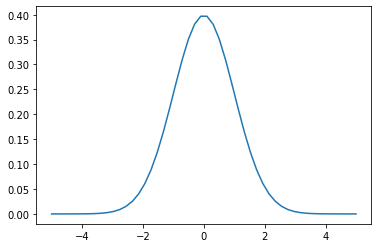

0.9999999999999998


In [3]:
x = np.linspace(-5, 5)
y = norm.pdf(x) #normは、特に指定がなければmu=0, sigma=1の正規分布
plt.plot(x, y)
plt.show()

# ついでに全区画を積分
y = lambda x: norm.pdf(x)
val, err = integrate.quad(y, -np.inf, np.inf)
print(val)

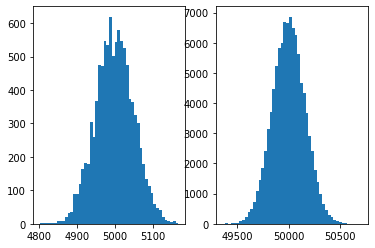

In [15]:
# n個のコインを投げ、表になった回数を求める。それをm回繰り返し、合計のリストを返す
def coin(n, m):
    list = []
    for i in range(m):
        front = np.random.randint(0, 2, size=m)
        list.append(front.sum())
    return list

fig, axes = plt.subplots(1, 2)

list = coin(100, 10000)
list2 = coin(100, 100000)

axes[0].hist(list, bins=50)
axes[1].hist(list2, bins=50)
plt.show()